## Exercise 2.c

In [2]:
import numpy as np
import scipy.stats as scipystats
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

pylab.rcParams['figure.figsize'] = (12, 10)
#matplotlib.rcParams['figure.dpi']=150

In [3]:
np.random.seed(1)
def uniSampler(n):
    # Generating random samples from -1 to 1
    # and returning a series of vectors
    X = np.random.uniform(-1,1,n)
    Y = np.random.uniform(-1,1,n)
    return (X, Y)

def estimator(samples):
    # Input is an series of vectors
    successes = 0
    for i in range (len(samples[0])):
        # Calculating the value for all given vectors,
        # and checking whether they meet the given criteria
        if ((samples[0][i])**2 + (samples[1][i])**2 <= 1):
            successes+=1
    # Normalising the end result to get an estimate of how
    # likely it is for the statement to be true
    return successes/len(samples[0])

# Printing readable results, compared to the expected value pi/4
length = 1000
samples = uniSampler(length)
print("estimator at sample size {0}:\t\t{1}".format(length, estimator(samples)))

length = 10000
samples = uniSampler(length)
print("estimator at sample size {0}:\t\t{1}".format(length, estimator(samples)))

length = 100000
samples = uniSampler(length)
print("estimator at sample size {0}:\t{1}".format(length, estimator(samples)))

length = 1000000
samples = uniSampler(length)
print("estimator at sample size {0}:\t{1}".format(length, estimator(samples)))

print("pi/4, found mathematically:\t\t{0}".format(np.pi/4))

estimator at sample size 1000:		0.766
estimator at sample size 10000:		0.7893
estimator at sample size 100000:	0.78474
estimator at sample size 1000000:	0.785553
pi/4, found mathematically:		0.7853981633974483


## Exercise 3.b,c,d

Stupid estimate average variance: 0.4561300748973738
Sample mean average variance: 0.36271949341394294


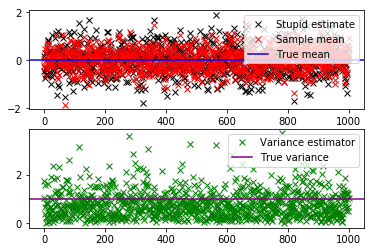

In [4]:
np.random.seed(1)

# Gaussian sample
def gauss(n):
    return np.random.normal(0,1,n)

# Theta^hat_stupid
def stuEst(samples):
    tempSum = 0
    for i in range(3):
        tempSum += samples[i]
    return 1/3 * tempSum

# Sample Mean
def sampleMean(samples):
    return 1/len(samples) * np.sum(samples)

# Variance Estimator
def varEst(samples):
    return 1/len(samples) * np.sum((samples-sampleMean(samples))**2)

# Calculating and plotting everything n times
def plotAll(distribution, n):
    retVal = np.zeros((3,n))
    for i in range(n):
        temp = gauss(distribution)
        retVal[0,i] = stuEst(temp)
        retVal[1,i] = sampleMean(temp)
        retVal[2,i] = varEst(temp)
    
    plt.subplot(2,1,1)
    plt.plot(retVal[0], color='black', marker ='x', label ="Stupid estimate", linestyle="none")
    plt.plot(retVal[1], color='red',   marker ='x', label ="Sample mean", linestyle="none")
    plt.axhline(0, color='blue', linestyle='-', label ="True mean")
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(retVal[2], color='green', marker ='x', label ="Variance estimator", linestyle="none")
    plt.axhline(1, color='purple', linestyle='-', label ="True variance")
    plt.legend()

    return retVal

size = 1000
sampleplot = plotAll(5, size)

print("Stupid estimate average variance: {0}".format(np.sum(abs(sampleplot[0]/size))))
print("Sample mean average variance: {0}".format(np.sum(abs(sampleplot[1]/size))))